In [316]:
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [298]:
directory = "/Users/mundogn/Documents/Estadistica-III-Proy1/CroppedYale_3/yaleB01"
X = np.zeros((65,32256))

In [299]:
for i in range(1,65):
    im = Image.open("/Users/mundogn/Documents/Estadistica-III-Proy1/CroppedYale_3/yaleB01/"+str(i)+".pgm")
    aux = np.asarray(im.getdata())
    aux = np.transpose(aux)
    X[i-1] = aux

In [300]:
X = np.transpose(X)


65

In [305]:
pca = PCA(n_components = 10)
principalComponents = pca.fit_transform(X)

In [306]:
#principalComponents = np.transpose(principalComponents)
len(principalComponents)

32256

In [307]:
principalComponents[:,0]

array([-491.38578593, -476.55389092, -479.51053969, ...,   93.49921541,
        118.76290067,  148.29614914])

In [308]:
im.putdata(principalComponents[:,1])
im.show()

/Users/mundogn/Library/Python/3.7/lib/python/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


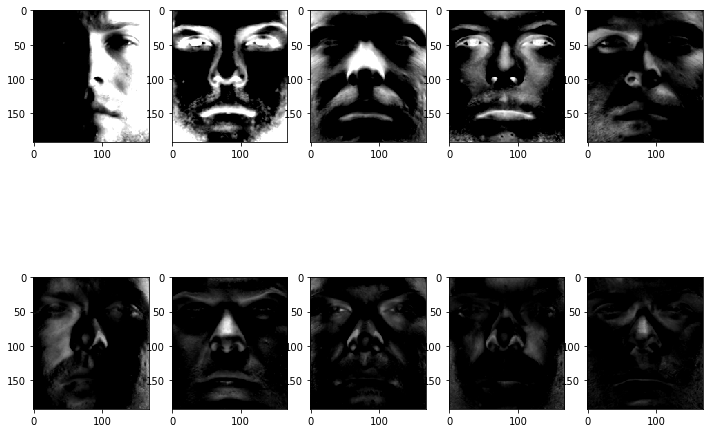

In [309]:
fig,axes = plt.subplots( 2,5, figsize=[12,9] )
for i,iax in enumerate( axes.flatten() ):
    im.putdata(principalComponents[:,i])
    iax.imshow(im)
fig.show()

In [291]:
pca.explained_variance_ratio_

array([0.50203106, 0.22798192, 0.10200824])

In [319]:
principalDf = pd.DataFrame(data = pca.explained_variance_ratio_
             , columns = ['Varianza explicada por componente'])
principalDf.head(10)

,Varianza explicada por componente
0,0.502031
1,0.227982
2,0.102008
3,0.059314
4,0.026658
5,0.018942
6,0.010987
7,0.007254
8,0.005286
9,0.003424


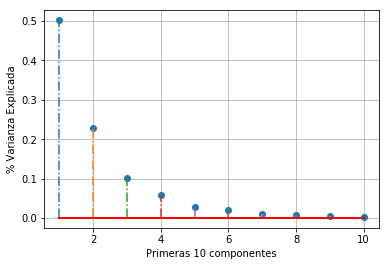

In [313]:
plt.ylabel('% Varianza Explicada')
plt.xlabel('Primeras 10 componentes')
plt.grid(True)
x = np.linspace(1, 10, 10)

markerline, stemlines, baseline = plt.stem(x, pca.explained_variance_ratio_, '-.')

# setting property of baseline with color red and linewidth 2
plt.setp(baseline, color='r', linewidth=2)

plt.show()

In [320]:
np.sum(pca.explained_variance_ratio_)

0.9638868841050943

In [292]:
X_pca = pca.transform(X)
projected = pca.inverse_transform(X_pca)
len(projected[0])


65

In [295]:
im.putdata(projected[:,48])
im.show()

/Users/mundogn/Library/Python/3.7/lib/python/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


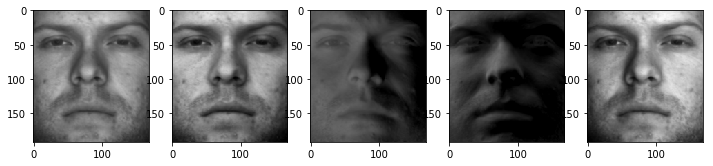

In [321]:
fig,axes = plt.subplots( 1,5, figsize=[12,9] )
for i,iax in enumerate( axes.flatten() ):
    im.putdata(projected[:,i*10])
    iax.imshow(im)
fig.show()

In [272]:
X_hat = X.mean(axis=1)
im.putdata(X_hat)
im.show()

In [296]:
pca.get_precision()

array([[ 2.08547939e-03, -7.78584857e-05, -6.84158155e-05, ...,
         3.70682359e-05,  2.28249131e-05, -0.00000000e+00],
       [-7.78584857e-05,  2.04673645e-03, -1.36724761e-04, ...,
         2.23926016e-05,  6.10099172e-06, -0.00000000e+00],
       [-6.84158155e-05, -1.36724761e-04,  1.95124229e-03, ...,
        -4.67501491e-06, -2.01049293e-05, -0.00000000e+00],
       ...,
       [ 3.70682359e-05,  2.23926016e-05, -4.67501491e-06, ...,
         2.11671246e-03, -2.97986291e-05, -0.00000000e+00],
       [ 2.28249131e-05,  6.10099172e-06, -2.01049293e-05, ...,
        -2.97986291e-05,  2.13526449e-03, -0.00000000e+00],
       [-0.00000000e+00, -0.00000000e+00, -0.00000000e+00, ...,
        -0.00000000e+00, -0.00000000e+00,  2.15830004e-03]])